Initial setup

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Set seed for consistency
random.seed(42)
np.random.seed(42)

# Colors for each group
group_colors = {'A': 'blue', 'B': 'red', 'C': 'yellow', 'D': 'purple', 'E': 'green'}

# Mapping group identifiers to full names
group_names = {'A': 'Extreme - reusables', 'B': 'Extreme - SUPT', 'C': 'General', 'D': 'Mild - reusables', 'E': 'Mild - SUPT'}

strength = {'High':1, 'Medium':0.5,'Low': 0.2}
probs = {'High':0.3, 'Medium':0.05, 'Low':0.01}

node_size = 20

CASE 1 - Symmetric population with segments mirroring one another in their intention to consume SUPT or reusables tableware

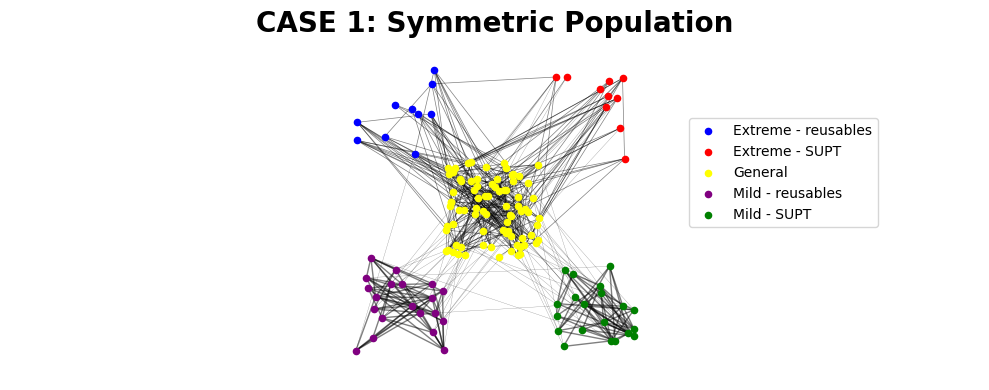

In [6]:
# Define the groups and their sizes
groups = {'A': 10, 'B': 10, 'C': 80, 'D': 20, 'E': 20}
# Intra-group connection probabilities and strengths
intra_group_probs = {'A': probs['Medium'], 'B': probs['Medium'], 'C': probs['Medium'], 'D': probs['High'], 'E': probs['High']}
intra_group_strengths = {'A': strength['Medium'], 'B': strength['Medium'], 'C': strength['Medium'], 'D': strength['High'], 'E': strength['High']}

# Inter-group connection probabilities and strengths
inter_group_probs = {
    ('A', 'B'): probs['Medium'], ('B', 'A'): probs['Medium'],
    ('A', 'C'): probs['Medium'], ('C', 'A'): probs['Medium'],
    ('A', 'D'): probs['Low'], ('D', 'A'): probs['Low'],
    ('A', 'E'): probs['Low'], ('E', 'A'): probs['Low'],
    ('B', 'C'): probs['Medium'], ('C', 'B'): probs['Medium'],
    ('B', 'D'): probs['Medium'], ('D', 'B'): probs['Low'],
    ('B', 'E'): probs['Low'], ('E', 'B'): probs['Low'],
    ('C', 'D'): probs['Low'], ('D', 'C'): probs['Low'],
    ('C', 'E'): probs['Low'], ('E', 'C'): probs['Low'],
    ('D', 'E'): probs['Low'], ('E', 'D'): probs['Low'],
}
inter_group_strengths = {
    ('A', 'B'): strength['Medium'], ('B', 'A'): strength['Medium'],
    ('A', 'C'): strength['Medium'], ('C', 'A'): strength['Medium'],
    ('A', 'D'): strength['Low'], ('D', 'A'): strength['Low'],
    ('A', 'E'): strength['Low'], ('E', 'A'): strength['Low'],
    ('B', 'C'): strength['Medium'], ('C', 'B'): strength['Medium'],
    ('B', 'D'): strength['Low'], ('D', 'B'): strength['Low'],
    ('B', 'E'): strength['Low'], ('E', 'B'): strength['Low'],
    ('C', 'D'): strength['Low'], ('D', 'C'): strength['Low'],
    ('C', 'E'): strength['Low'], ('E', 'C'): strength['Low'],
    ('D', 'E'): strength['Low'], ('E', 'D'): strength['Low'],
}

# Initialize the network
G = nx.Graph()

# Add nodes with group attributes
node_count = 0
for group, size in groups.items():
    for _ in range(size):
        G.add_node(node_count, group=group)
        node_count += 1

# Add intra-group edges with strengths
for group, size in groups.items():
    nodes = [node for node, attr in G.nodes(data=True) if attr['group'] == group]
    for i, node1 in enumerate(nodes):
        for node2 in nodes[i+1:]:
            if random.random() < intra_group_probs[group]:
                G.add_edge(node1, node2, weight=intra_group_strengths[group])

# Add inter-group edges with strengths
for node1, attr1 in G.nodes(data=True):
    for node2, attr2 in G.nodes(data=True):
        if node1 < node2:  # Ensure each pair is considered only once
            group_pair = (attr1['group'], attr2['group'])
            if group_pair in inter_group_probs and random.random() < inter_group_probs[group_pair]:
                G.add_edge(node1, node2, weight=inter_group_strengths[group_pair])

# Manually position nodes to separate groups
group_centers = {
    'A': np.array([0.4, 0.6]),
    'B': np.array([0.6, 0.6]),
    'C': np.array([0.5, 0.5]),
    'D': np.array([0.4, 0.4]),
    'E': np.array([0.6, 0.4]),
}
pos = {}
for node in G.nodes:
    group = G.nodes[node]['group']
    center = group_centers[group]
    pos[node] = center + np.random.rand(2) * 0.1 - 0.025

# Calculate edge widths based on the 'weight' attribute
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

# Visualize the network
plt.figure(figsize=(10, 4))
for group, color in group_colors.items():
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['group'] == group], node_size=node_size, node_color=color, label=group_names[group])
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=edge_widths, alpha=0.5)

plt.legend(scatterpoints=1, loc=(0.7,0.45))
plt.axis('equal')
plt.axis('off')
plt.title("CASE 1: Symmetric Population", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('Case1_network.jpg', format='jpg', dpi=300)
plt.show()

CASE 2 - Biased population with more segments with an inherent tendency to consume SUPT

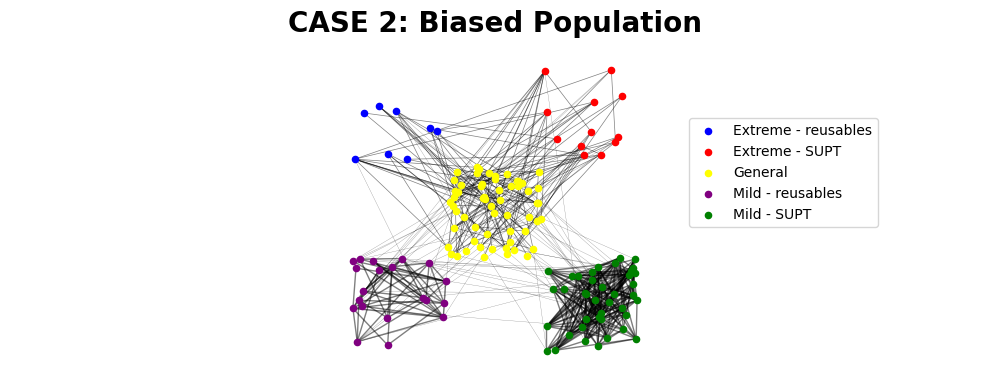

In [3]:
# Define the groups and their sizes
groups = {'A': 8, 'B': 12, 'C': 60, 'D': 20, 'E': 40}
# Intra-group connection probabilities and strengths
intra_group_probs = {'A': probs['Medium'], 'B': probs['Medium'], 'C': probs['Medium'], 'D': probs['High'], 'E': probs['High']}
intra_group_strengths = {'A': strength['Medium'], 'B': strength['Medium'], 'C': strength['Medium'], 'D': strength['High'], 'E': strength['High']}

# Inter-group connection probabilities and strengths
inter_group_probs = {
    ('A', 'B'): probs['Medium'], ('B', 'A'): probs['Medium'],
    ('A', 'C'): probs['Medium'], ('C', 'A'): probs['Medium'],
    ('A', 'D'): probs['Low'], ('D', 'A'): probs['Low'],
    ('A', 'E'): probs['Low'], ('E', 'A'): probs['Low'],
    ('B', 'C'): probs['Medium'], ('C', 'B'): probs['Medium'],
    ('B', 'D'): probs['Medium'], ('D', 'B'): probs['Low'],
    ('B', 'E'): probs['Low'], ('E', 'B'): probs['Low'],
    ('C', 'D'): probs['Low'], ('D', 'C'): probs['Low'],
    ('C', 'E'): probs['Low'], ('E', 'C'): probs['Low'],
    ('D', 'E'): probs['Low'], ('E', 'D'): probs['Low'],
}
inter_group_strengths = {
    ('A', 'B'): strength['Medium'], ('B', 'A'): strength['Medium'],
    ('A', 'C'): strength['Medium'], ('C', 'A'): strength['Medium'],
    ('A', 'D'): strength['Low'], ('D', 'A'): strength['Low'],
    ('A', 'E'): strength['Low'], ('E', 'A'): strength['Low'],
    ('B', 'C'): strength['Medium'], ('C', 'B'): strength['Medium'],
    ('B', 'D'): strength['Low'], ('D', 'B'): strength['Low'],
    ('B', 'E'): strength['Low'], ('E', 'B'): strength['Low'],
    ('C', 'D'): strength['Low'], ('D', 'C'): strength['Low'],
    ('C', 'E'): strength['Low'], ('E', 'C'): strength['Low'],
    ('D', 'E'): strength['Low'], ('E', 'D'): strength['Low'],
}

# Initialize the network
G = nx.Graph()

# Add nodes with group attributes
node_count = 0
for group, size in groups.items():
    for _ in range(size):
        G.add_node(node_count, group=group)
        node_count += 1

# Add intra-group edges with strengths
for group, size in groups.items():
    nodes = [node for node, attr in G.nodes(data=True) if attr['group'] == group]
    for i, node1 in enumerate(nodes):
        for node2 in nodes[i+1:]:
            if random.random() < intra_group_probs[group]:
                G.add_edge(node1, node2, weight=intra_group_strengths[group])

# Add inter-group edges with strengths
for node1, attr1 in G.nodes(data=True):
    for node2, attr2 in G.nodes(data=True):
        if node1 < node2:  # Ensure each pair is considered only once
            group_pair = (attr1['group'], attr2['group'])
            if group_pair in inter_group_probs and random.random() < inter_group_probs[group_pair]:
                G.add_edge(node1, node2, weight=inter_group_strengths[group_pair])

# Manually position nodes to separate groups
group_centers = {
    'A': np.array([0.4, 0.6]),
    'B': np.array([0.6, 0.6]),
    'C': np.array([0.5, 0.5]),
    'D': np.array([0.4, 0.4]),
    'E': np.array([0.6, 0.4]),
}
pos = {}
for node in G.nodes:
    group = G.nodes[node]['group']
    center = group_centers[group]
    pos[node] = center + np.random.rand(2) * 0.1 - 0.025

# Calculate edge widths based on the 'weight' attribute
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

# Visualize the network
plt.figure(figsize=(10, 4))
for group, color in group_colors.items():
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['group'] == group], node_size=node_size, node_color=color, label=group_names[group])
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=edge_widths, alpha=0.5)

plt.legend(scatterpoints=1, loc=(0.7,0.45))
plt.axis('equal')
plt.axis('off')
plt.title("CASE 2: Biased Population", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('Case2_network.jpg', format='jpg', dpi=300)
plt.show()

CASE 3 - A fragmented population with little to no connection between separated segments

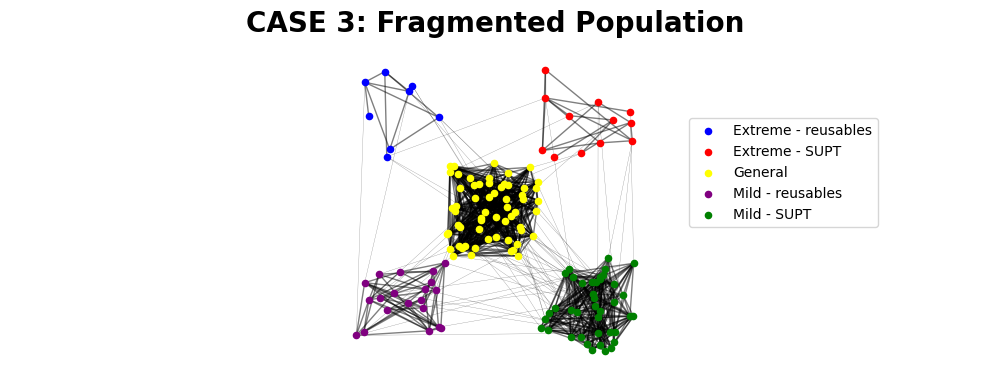

In [8]:
# Define the groups and their sizes
groups = {'A': 8, 'B': 12, 'C': 60, 'D': 20, 'E': 40}
# Intra-group connection probabilities and strengths
intra_group_probs = {'A': probs['High'], 'B': probs['High'], 'C': probs['High'], 'D': probs['High'], 'E': probs['High']}
intra_group_strengths = {'A': strength['High'], 'B': strength['High'], 'C': strength['High'], 'D': strength['High'], 'E': strength['High']}

# Inter-group connection probabilities and strengths
inter_group_probs = {
    ('A', 'B'): probs['Low'], ('B', 'A'): probs['Low'],
    ('A', 'C'): probs['Low'], ('C', 'A'): probs['Low'],
    ('A', 'D'): probs['Low'], ('D', 'A'): probs['Low'],
    ('A', 'E'): probs['Low'], ('E', 'A'): probs['Low'],
    ('B', 'C'): probs['Low'], ('C', 'B'): probs['Low'],
    ('B', 'D'): probs['Low'], ('D', 'B'): probs['Low'],
    ('B', 'E'): probs['Low'], ('E', 'B'): probs['Low'],
    ('C', 'D'): probs['Low'], ('D', 'C'): probs['Low'],
    ('C', 'E'): probs['Low'], ('E', 'C'): probs['Low'],
    ('D', 'E'): probs['Low'], ('E', 'D'): probs['Low'],
}
inter_group_strengths = {
    ('A', 'B'): strength['Low'], ('B', 'A'): strength['Low'],
    ('A', 'C'): strength['Low'], ('C', 'A'): strength['Low'],
    ('A', 'D'): strength['Low'], ('D', 'A'): strength['Low'],
    ('A', 'E'): strength['Low'], ('E', 'A'): strength['Low'],
    ('B', 'C'): strength['Low'], ('C', 'B'): strength['Low'],
    ('B', 'D'): strength['Low'], ('D', 'B'): strength['Low'],
    ('B', 'E'): strength['Low'], ('E', 'B'): strength['Low'],
    ('C', 'D'): strength['Low'], ('D', 'C'): strength['Low'],
    ('C', 'E'): strength['Low'], ('E', 'C'): strength['Low'],
    ('D', 'E'): strength['Low'], ('E', 'D'): strength['Low'],
}

# Initialize the network
G = nx.Graph()

# Add nodes with group attributes
node_count = 0
for group, size in groups.items():
    for _ in range(size):
        G.add_node(node_count, group=group)
        node_count += 1

# Add intra-group edges with strengths
for group, size in groups.items():
    nodes = [node for node, attr in G.nodes(data=True) if attr['group'] == group]
    for i, node1 in enumerate(nodes):
        for node2 in nodes[i+1:]:
            if random.random() < intra_group_probs[group]:
                G.add_edge(node1, node2, weight=intra_group_strengths[group])

# Add inter-group edges with strengths
for node1, attr1 in G.nodes(data=True):
    for node2, attr2 in G.nodes(data=True):
        if node1 < node2:  # Ensure each pair is considered only once
            group_pair = (attr1['group'], attr2['group'])
            if group_pair in inter_group_probs and random.random() < inter_group_probs[group_pair]:
                G.add_edge(node1, node2, weight=inter_group_strengths[group_pair])

# Manually position nodes to separate groups
group_centers = {
    'A': np.array([0.4, 0.6]),
    'B': np.array([0.6, 0.6]),
    'C': np.array([0.5, 0.5]),
    'D': np.array([0.4, 0.4]),
    'E': np.array([0.6, 0.4]),
}
pos = {}
for node in G.nodes:
    group = G.nodes[node]['group']
    center = group_centers[group]
    pos[node] = center + np.random.rand(2) * 0.1 - 0.025

# Calculate edge widths based on the 'weight' attribute
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

# Visualize the network
plt.figure(figsize=(10, 4))
for group, color in group_colors.items():
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['group'] == group], node_size=node_size, node_color=color, label=group_names[group])
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=edge_widths, alpha=0.5)

plt.legend(scatterpoints=1, loc=(0.7,0.45))
plt.axis('equal')
plt.axis('off')
plt.title("CASE 3: Fragmented Population", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('Case3_network.jpg', format='jpg', dpi=300)
plt.show()

CASE 4 - An over-connected population with highly connected segments, both among themselves and with each other

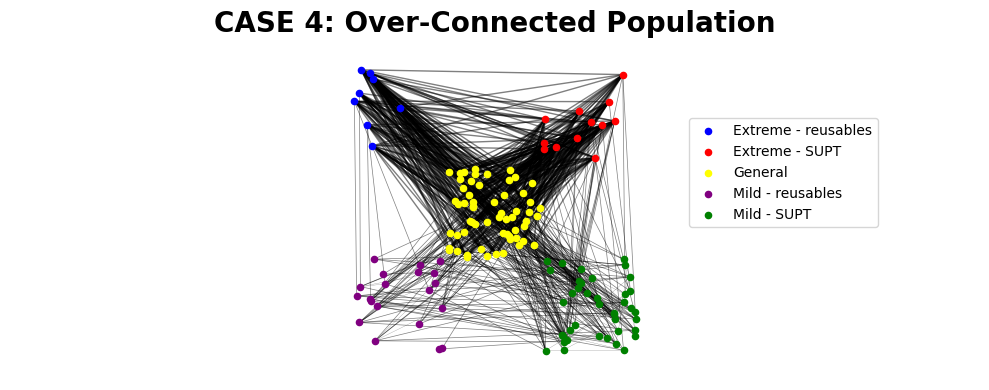

In [5]:
# Define the groups and their sizes
groups = {'A': 8, 'B': 12, 'C': 60, 'D': 20, 'E': 40}
# Intra-group connection probabilities and strengths
intra_group_probs = {'A': probs['Low'], 'B': probs['Low'], 'C': probs['Low'], 'D': probs['Medium'], 'E': probs['Medium']}
intra_group_strengths = {'A': strength['Low'], 'B': strength['Low'], 'C': strength['Low'], 'D': strength['Low'], 'E': strength['Low']}

# Inter-group connection probabilities and strengths
inter_group_probs = {
    ('A', 'B'): probs['High'], ('B', 'A'): probs['High'],
    ('A', 'C'): probs['High'], ('C', 'A'): probs['High'],
    ('A', 'D'): probs['Medium'], ('D', 'A'): probs['Medium'],
    ('A', 'E'): probs['Medium'], ('E', 'A'): probs['Medium'],
    ('B', 'C'): probs['High'], ('C', 'B'): probs['High'],
    ('B', 'D'): probs['Medium'], ('D', 'B'): probs['Medium'],
    ('B', 'E'): probs['Medium'], ('E', 'B'): probs['Medium'],
    ('C', 'D'): probs['Medium'], ('D', 'C'): probs['Medium'],
    ('C', 'E'): probs['Medium'], ('E', 'C'): probs['Medium'],
    ('D', 'E'): probs['Medium'], ('E', 'D'): probs['Medium'],
}
inter_group_strengths = {
    ('A', 'B'): strength['High'], ('B', 'A'): strength['High'],
    ('A', 'C'): strength['High'], ('C', 'A'): strength['High'],
    ('A', 'D'): strength['Medium'], ('D', 'A'): strength['Medium'],
    ('A', 'E'): strength['Medium'], ('E', 'A'): strength['Medium'],
    ('B', 'C'): strength['High'], ('C', 'B'): strength['High'],
    ('B', 'D'): strength['Medium'], ('D', 'B'): strength['Medium'],
    ('B', 'E'): strength['Medium'], ('E', 'B'): strength['Medium'],
    ('C', 'D'): strength['Medium'], ('D', 'C'): strength['Medium'],
    ('C', 'E'): strength['Medium'], ('E', 'C'): strength['Medium'],
    ('D', 'E'): strength['Medium'], ('E', 'D'): strength['Medium'],
}

# Initialize the network
G = nx.Graph()

# Add nodes with group attributes
node_count = 0
for group, size in groups.items():
    for _ in range(size):
        G.add_node(node_count, group=group)
        node_count += 1

# Add intra-group edges with strengths
for group, size in groups.items():
    nodes = [node for node, attr in G.nodes(data=True) if attr['group'] == group]
    for i, node1 in enumerate(nodes):
        for node2 in nodes[i+1:]:
            if random.random() < intra_group_probs[group]:
                G.add_edge(node1, node2, weight=intra_group_strengths[group])

# Add inter-group edges with strengths
for node1, attr1 in G.nodes(data=True):
    for node2, attr2 in G.nodes(data=True):
        if node1 < node2:  # Ensure each pair is considered only once
            group_pair = (attr1['group'], attr2['group'])
            if group_pair in inter_group_probs and random.random() < inter_group_probs[group_pair]:
                G.add_edge(node1, node2, weight=inter_group_strengths[group_pair])

# Manually position nodes to separate groups
group_centers = {
    'A': np.array([0.4, 0.6]),
    'B': np.array([0.6, 0.6]),
    'C': np.array([0.5, 0.5]),
    'D': np.array([0.4, 0.4]),
    'E': np.array([0.6, 0.4]),
}
pos = {}
for node in G.nodes:
    group = G.nodes[node]['group']
    center = group_centers[group]
    pos[node] = center + np.random.rand(2) * 0.1 - 0.025

# Calculate edge widths based on the 'weight' attribute
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

# Visualize the network
plt.figure(figsize=(10, 4))
for group, color in group_colors.items():
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['group'] == group], node_size=node_size, node_color=color, label=group_names[group])
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=edge_widths, alpha=0.5)

plt.legend(scatterpoints=1, loc=(0.7,0.45))
plt.axis('equal')
plt.axis('off')
plt.title("CASE 4: Over-Connected Population", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('Case4_network.jpg', format='jpg', dpi=300)
plt.show()